In [90]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import gdax, cbpro
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sys.path.append('S:/products and engineering - 0048187/Quantitative Analysis/Research/svn/Antonio/subversion-pe/')
import core
asys = core.AnalysisComponents()

In [2]:
order_book = cbpro.OrderBook(product_id='BTC-USD')
order_book.start()
time.sleep(10)
order_book.close()

-- Subscribed to OrderBook! --

Connection is already closed. - data: None

-- OrderBook Socket Closed! --


In [5]:
for sec in range(10):
    print(dt.datetime.now())
    time.sleep(1)

2019-11-04 16:30:13.592201
2019-11-04 16:30:14.593139
2019-11-04 16:30:15.593375
2019-11-04 16:30:16.593657
2019-11-04 16:30:17.594331
2019-11-04 16:30:18.594531
2019-11-04 16:30:19.595052
2019-11-04 16:30:20.595502
2019-11-04 16:30:21.595590
2019-11-04 16:30:22.595798


In [4]:
##download data and add some extra features for the model

#now = dt.datetime.now()
#end = now - dt.timedelta(minutes=10)
#start = end - dt.timedelta(minutes=70)

public_client = gdax.PublicClient()
z = public_client.get_product_historic_rates('BTC-USD')
dfh = pd.DataFrame(z, columns=['time','low','high','open','close','volume'])
dfh['time'] = dfh['time'].map(lambda x: dt.datetime.utcfromtimestamp(x).isoformat())
dfh = dfh.sort_values('time').reset_index(drop=True)

## more X variables
#for reference: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
dfh['close_SMA_5'] = dfh.loc[:,'close'].rolling(window=5).mean()
dfh['close_SMA_20'] = dfh.loc[:,'close'].rolling(window=20).mean()
dfh['close_SMA_60'] = dfh.loc[:,'close'].rolling(window=60).mean()

dfh['close_EMA_5'] = dfh.loc[:,'close'].ewm(span=5, adjust=False).mean()
dfh['close_EMA_20'] = dfh.loc[:,'close'].ewm(span=20, adjust=False).mean()
dfh['close_EMA_60'] = dfh.loc[:,'close'].ewm(span=60, adjust=False).mean()

## y variables
dfh = pd.concat([dfh, pd.DataFrame(np.array(dfh.loc[1:,'close']), columns=['y1'])],axis=1) #close in 1 period
dfh = pd.concat([dfh, pd.DataFrame(np.array(dfh.loc[5:,'close']), columns=['y5'])],axis=1) #close in 5 periods

In [ ]:
x = public_client.get_product_order_book('BTC-USD', level=3)
print(public_client.get_time())

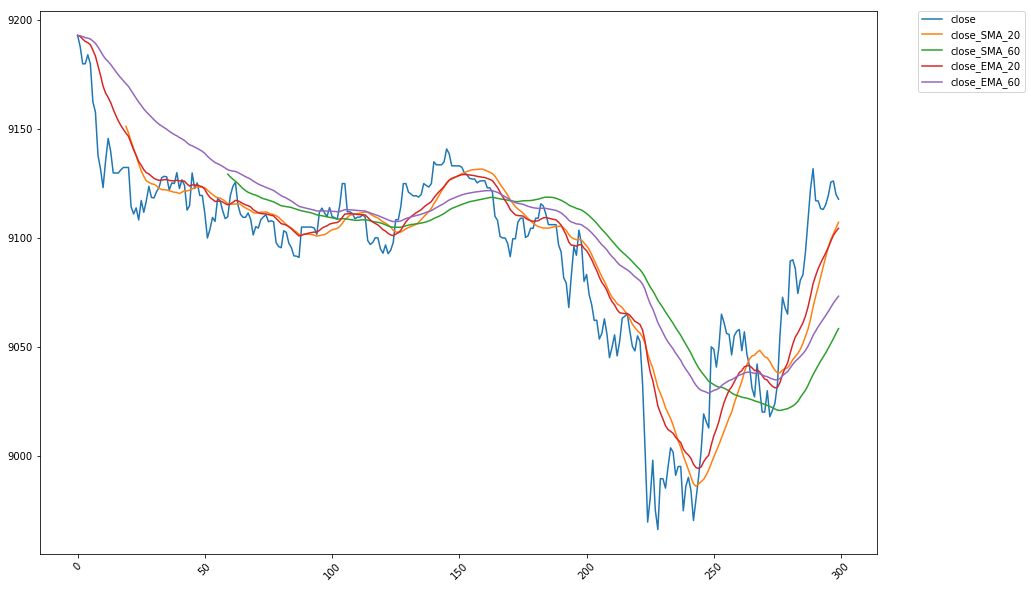

In [3]:
plt.rcParams["figure.figsize"] = (15,10)
dfh.loc[:,['close','close_SMA_20','close_SMA_60','close_EMA_20','close_EMA_60']].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

In [6]:
dfh

,time,low,high,open,close,volume,close_SMA_5,close_SMA_20,close_SMA_60,close_EMA_5,close_EMA_20,close_EMA_60,y1,y5
0,2019-11-01T10:04:00,9115.32,9118.55,9117.27,9115.59,0.794771,NaN,NaN,NaN,9115.590000,9115.590000,9115.590000,9127.25,9140.60
1,2019-11-01T10:05:00,9115.59,9130.84,9115.59,9127.25,10.894057,NaN,NaN,NaN,9119.476667,9116.700476,9115.972295,9135.22,9133.55
2,2019-11-01T10:06:00,9127.25,9138.09,9127.25,9135.22,15.139467,NaN,NaN,NaN,9124.724444,9118.464240,9116.603367,9141.00,9135.51
3,2019-11-01T10:07:00,9135.23,9152.24,9135.23,9141.00,29.650252,NaN,NaN,NaN,9130.149630,9120.610503,9117.403257,9138.61,9135.37
4,2019-11-01T10:08:00,9138.44,9144.00,9141.00,9138.61,1.793787,9131.534,NaN,NaN,9132.969753,9122.324741,9118.098560,9140.60,9135.37
5,2019-11-01T10:09:00,9131.36,9140.60,9138.74,9140.60,8.585514,9136.536,NaN,NaN,9135.513169,9124.065242,9118.836312,9133.55,9138.38
6,2019-11-01T10:10:00,9131.61,9139.89,9139.89,9133.55,2.930735,9137.796,NaN,NaN,9134.858779,9124.968552,9119.318728,9135.51,9131.55
7,2019-11-01T10:11:00,9133.10,9135.51,9133.10,9135.51,4.503335,9137.854,NaN,NaN,9135.075853,9125.972500,9119.849590,9135.37,9130.10
8,2019-11-01T10:12:00,9135.37,9135.51,9135.50,9135.37,2.397905,9136.728,NaN,NaN,9135.173902,9126.867500,9120.358455,9135.37,9134.74
9,2019-11-01T10:13:00,9135.37,9135.38,9135.38,9135.37,0.385778,9136.080,NaN,NaN,9135.239268,9127.677262,9120.850637,9138.38,9137.78


In [7]:
##Linear multivariate regression

ew = 100 #estimation window
normalize=True
predicted_period = 1 #of y variable

y = 'y' + str(predicted_period)

dfpred = pd.DataFrame()
for i in range(len(dfh) - ew + 1 - predicted_period):
    dfe = dfh.iloc[i:i + ew, :]
    dfe = dfe.dropna(axis=0)
    x_var = dfe.iloc[:,1:-2]
    y_var = dfe[y]
    
    x_varpred = dfh.iloc[[i + ew], 1:-2] #predict on the next period variables
    
    reg = LinearRegression(fit_intercept=True, normalize=normalize).fit(x_var, y_var) #takes longtime to normalize
    pred = np.dot(reg.coef_, np.array(x_varpred).T) + reg.intercept_
    dfpred = pd.concat([dfpred, pd.DataFrame([dfh.iloc[i + ew, 0], pred[0]]).T]) #mapped to the next period time
    
dfpred.columns = ['time','ypred']
dfres1 = pd.merge(dfh, dfpred, how='left', on='time')[['time','close', y, 'ypred']]
dfres1 = dfres1[-dfres1.ypred.isnull()][['time','close', y, 'ypred']]

In [27]:
dfres1['actual_move'] = np.where(dfres1['close']<dfres1[y],'up','down')
dfres1

,time,close,y1,ypred,actual_move
100,2019-10-31T07:58:00,9109.84,9109.31,9110.62,down
101,2019-10-31T07:59:00,9109.31,9108.63,9109.55,down
102,2019-10-31T08:00:00,9108.63,9114.99,9106.34,up
103,2019-10-31T08:01:00,9114.99,9125.00,9117.54,up
104,2019-10-31T08:02:00,9125.00,9125.00,9128.27,down
105,2019-10-31T08:03:00,9125.00,9112.01,9124.51,down
106,2019-10-31T08:04:00,9112.01,9112.01,9109.86,down
107,2019-10-31T08:05:00,9112.01,9111.18,9113.66,down
108,2019-10-31T08:06:00,9111.18,9108.81,9114.79,down
109,2019-10-31T08:07:00,9108.81,9109.60,9110.29,up


In [ ]:
### websocket

In [ ]:
#https://buildmedia.readthedocs.org/media/pdf/copra/latest/copra.pdf
#https://stackoverflow.com/questions/48132078/available-gdax-order-statuses-and-meanings

class myWebsocketClient(cbpro.WebsocketClient):
    
    def on_open(self):
        self.url = "wss://ws-feed.pro.coinbase.com/"
        self.products = ["BTC-USD"]
        self.message_count = 0
        self.message_count2 = 0
        self.message_record =0
        self.exec=1
        self.channels = ['full']
        self.dfm = ''#pd.DataFrame()

    def on_message(self, msg):
        self.message_count += 1
        if msg['type'] == 'match':
            self.message_count2 += 1
            print(self.message_count, self.message_count2)
            print(msg['type'])
            self.dfm = msg
            
    def on_close(self):
        print("-- connection closed! --")
        
    def get_data(self):
        return self.dfm
    
    
class myOrderBookWs(cbpro.OrderBook):
    def on_open(self):
        self.products = ["BTC-USD"]
        self.message_count = 0
        self.message_count2 = 0
        self.message_record =0
        self.exec=1
        self.channels = ['full']
        self.dfm = ''#pd.DataFrame()
        self.ordertype = list()

    def on_message(self, msg):
        self.message_count += 1
        self.ordertype = self.ordertype.append(msg['type'])
        if msg['type'] == 'match':
            self.message_count2 += 1
            print(self.message_count, self.message_count2)
            print(msg['type'])
            self.dfm = msg

    def on_close(self):
        print("-- connection closed! --")
    
    def get_data(self):
        return self.dfm
    
    def get_types(self):
        return self.ordertype

In [40]:
## run websocket
wsClient = myWebsocketClient()
wsClient.start()

while (wsClient.message_count2 < 2):
    pass
wsClient.close()
dfp = wsClient.get_data()

# order book
order_book = myOrderBookWs()
order_book.start()
while (order_book.message_count2 < 2):
    pass
order_book.close()
dfo = order_book.get_data()

1077 1
match
1090 2
match
-- connection closed! --


In [41]:
dfp

{'maker_order_id': 'ed1ab726-ef4b-466b-9829-1a86fddd9847',
 'price': '9313.75',
 'product_id': 'BTC-USD',
 'sequence': 11168611963,
 'side': 'sell',
 'size': '0.00459464',
 'taker_order_id': '2138205b-c822-4a7e-9eab-f52e0c12bff7',
 'time': '2019-11-04T17:00:56.880000Z',
 'trade_id': 77290654,
 'type': 'match'}

In [ ]:
# order book
order_book = myOrderBookWs()
order_book.start()
while (order_book.message_count2 < 2):
    pass
order_book.close()
dfo = order_book.get_data()

In [ ]:
received,open,done,match

### book

In [272]:
def get_order_book3(x, agg=True, perc=2):
    
    typs = (('asks',True),('bids',False))
    df = pd.DataFrame()
    for typ in typs:
        df_ = pd.DataFrame(x[typ[0]])[[0,1]]
        df_[0] = df_[0].map(lambda x: float(x))
        df_[1] = df_[1].map(lambda x: float(x))
        if agg:
            df_ = df_.groupby(0).sum()
            df_ = df_.reset_index()
        df_.columns = [typ[0]+'_price', typ[0]+'_size']
        df_ = df_.sort_values(typ[0]+'_price', ascending=typ[1])
        df_ = df_.reset_index(drop=True)
        df = pd.concat([df,df_], axis=1)
        
    if dpr > 0:
        #df = df[(-df.asks_price.isnull()) & (df.asks_price< df.iloc[0,0] * (1 + perc/100))]
        df = df[(-df.bids_price.isnull()) & (df.bids_price > df.iloc[0,2] * (1 - perc/100))]
        
    return df

def get_vwquotes(df, t, percs=[], tops=[]):
    
    df1 = pd.DataFrame([t], columns=['time'])
    if len(percs)>0:
        row1 = []
        for perc in percs:
            df_ = df[(-df.bids_price.isnull()) & (df.bids_price > df.iloc[0,2] * (1 - perc/100))]         
            df1['vwask_' + str(perc) + 'prc'] = (df_['asks_price'] * (df_['asks_size'] / df_['asks_size'].sum())).sum()
            df1['vwbid_' + str(perc) + 'prc'] = (df_['bids_price'] * (df_['bids_size'] / df_['bids_size'].sum())).sum()
            
    df2 = pd.DataFrame([t], columns=['time'])
    if len(tops)>0:  
        row2 = []
        for top in tops:
            df_ = df[(-df.bids_price.isnull())].head(top)
            df2['vwask_' + str(top) + 'top'] = (df_['asks_price'] * (df_['asks_size'] / df_['asks_size'].sum())).sum()
            df2['vwbid_' + str(top) + 'top'] = (df_['bids_price'] * (df_['bids_size'] / df_['bids_size'].sum())).sum()
            
    dfvw = pd.merge(df1, df2, on='time')
    
    return dfvw

def plot_pdf(data, label=''):
    from scipy.stats.kde import gaussian_kde
    from numpy import linspace
    #data = data[~np.isnan(data)]
    kde = gaussian_kde(list(data))
    dist_space = linspace(min(data), max(data), 100)
    plt.plot(dist_space, kde(dist_space), label=label)
    plt.legend(loc='upper left', bbox_to_anchor=(0, -0.2), shadow=True, ncol=1)
    plt.xticks(rotation=45)

In [ ]:
public_client = gdax.PublicClient()
dfres = pd.DataFrame()
for sec in range(10):
    dft = pd.DataFrame([public_client.get_time()])
    x = public_client.get_product_order_book('BTC-EUR', level=3)
    df = get_order_book3(x, True, 0.03)
    dfres = pd.concat([dfres, get_vwquotes(df, dft.iloc[0,1], percs=[1,2], tops=[5,10])], axis=0)
    time.sleep(1)

In [284]:
dfres

,time,vwask_1prc,vwbid_1prc,vwask_2prc,vwbid_2prc,vwask_5top,vwbid_5top,vwask_10top,vwbid_10top
0,2019-11-05T10:47:46.972Z,8351.315637,8349.994968,8351.315637,8349.994968,8351.315637,8349.994968,8351.315637,8349.994968
0,2019-11-05T10:47:48.677Z,8351.258621,8349.994968,8351.258621,8349.994968,8351.258621,8349.994968,8351.258621,8349.994968
0,2019-11-05T10:47:49.968Z,8351.258626,8349.994968,8351.258626,8349.994968,8351.258626,8349.994968,8351.258626,8349.994968
0,2019-11-05T10:47:51.700Z,8351.258626,8349.994968,8351.258626,8349.994968,8351.258626,8349.994968,8351.258626,8349.994968
0,2019-11-05T10:47:53.146Z,8351.315729,8349.994968,8351.315729,8349.994968,8351.315729,8349.994968,8351.315729,8349.994968
0,2019-11-05T10:47:54.458Z,8351.315729,8349.994968,8351.315729,8349.994968,8351.315729,8349.994968,8351.315729,8349.994968
0,2019-11-05T10:47:55.689Z,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968
0,2019-11-05T10:47:56.901Z,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968
0,2019-11-05T10:47:58.292Z,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968
0,2019-11-05T10:47:59.801Z,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968,8351.317191,8349.994968


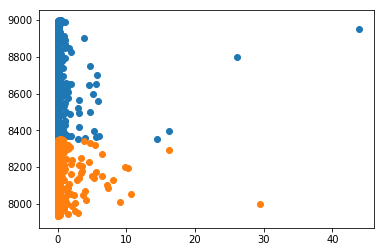

In [280]:
public_client = gdax.PublicClient()
x = public_client.get_product_order_book('BTC-EUR', level=3)

dfag = get_order_book3(x, perc=5)
x_ = dfag['asks_size']
y_ = dfag['asks_price']
plt.scatter(x_, y_)

x_ = dfag['bids_size']
y_ = dfag['bids_price']
plt.scatter(x_, y_);

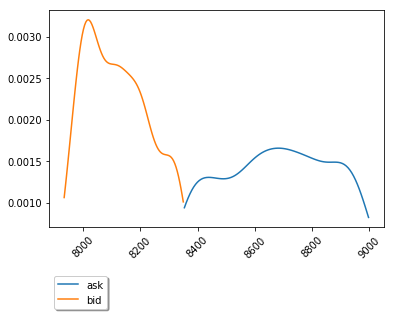

In [281]:
plot_pdf(dfag[(-dfag.asks_price.isnull())]['asks_price'], 'ask')
plot_pdf(dfag[(-dfag.bids_price.isnull())]['bids_price'], 'bid');